# KNN & SVM Classification with Iris Dataset

## 📝 Step 1: Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

## 📚 Step 2: Load and Explore Iris Dataset

In [24]:
iris = load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Convert to DataFrame for easier viewing
df = pd.DataFrame(X, columns=iris.feature_names[:2])
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [15]:
df['target'].value_counts()


target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## 🔧 Step 3: Preprocessing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train[0])

[4.6 3.6]


In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0])

[-1.47393679  1.20365799]


## 🎓 Step 4: K-Nearest Neighbors (KNN)

### 🔢 Mathematical Concept:
- Calculate Euclidean distance between points.
- Predict based on the majority class among "k" closest points.

\[D(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}\]

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30

Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  2  9]]


### 📊 Plot Decision Boundary for KNN

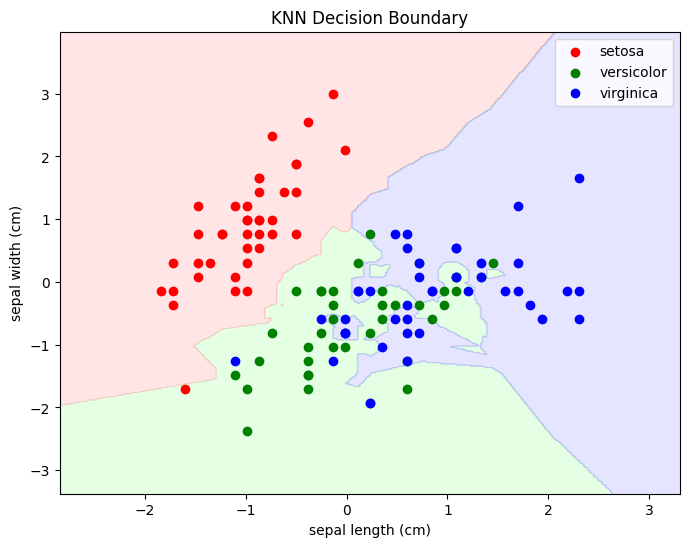

In [28]:
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], c=cmap_bold[idx], label=iris.target_names[cls])
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, knn, "KNN Decision Boundary")

## 📚 Step 5: Support Vector Machine (SVM)

### 🔢 Mathematical Concept:
- Find a **hyperplane** that maximizes the margin between classes.

\[w \cdot x + b = 0\]

Where:
- \(w\) is the normal vector
- \(b\) is the bias

Maximize margin \( \frac{2}{||w||} \)

In [29]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


### 📊 Plot Decision Boundary for SVM

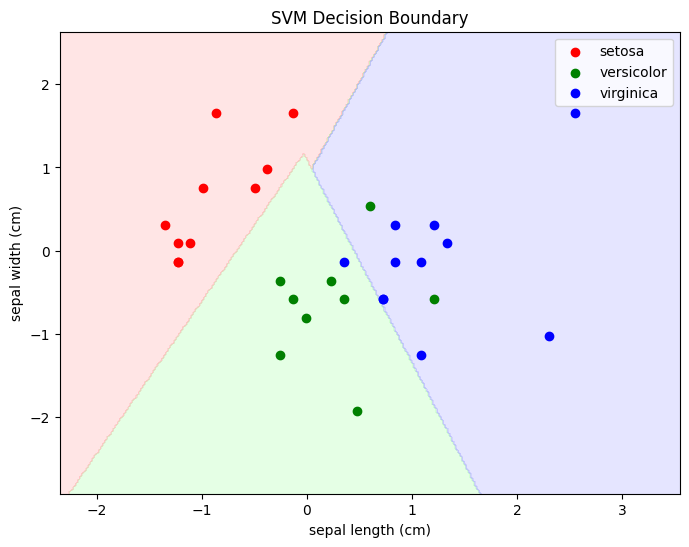

In [31]:
plot_decision_boundary(X_test, y_test, svm, "SVM Decision Boundary")

## ✅ Step 6: Summary
- **KNN** uses distance metrics to classify based on neighbors.
- **SVM** finds the optimal hyperplane that separates classes with maximum margin.
- Decision boundaries help visualize model behavior on simple features.